#  <span style="color:#cc416d"> Análisis exploratorio de datos piezométricos </span>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Ruta al CSV
ruta_csv = r"C:/Proyectos/2024/Conejos/mapas/pozos.csv"
#salida
ruta_salida = r"C:/Proyectos/2024/Conejos/mapas/"

# Leer CSV
df = pd.read_csv(ruta_csv)

In [17]:
# Columnas de años (todas las que son numéricas de 4 dígitos)
anios = [col for col in df.columns if col.isdigit()]

# 1️⃣ Total de pozos
total_pozos = len(df)

# 2️⃣ Pozos con al menos un valor en cualquier año
pozos_con_valor = df[anios].notna().any(axis=1).sum()

# 3️⃣ Pozos sin ningún valor en ningún año
pozos_sin_valor = total_pozos - pozos_con_valor


In [18]:
# 4️⃣ Resumen por año
resumen_anual = []
for anio in anios:
    con_valor = df[anio].notna().sum()
    sin_valor = total_pozos - con_valor
    resumen_anual.append({
        "Año": anio,
        "Pozos con valor": con_valor,
        "Pozos sin valor": sin_valor
    })

resumen_df = pd.DataFrame(resumen_anual)

In [19]:
# 5️⃣ Estadísticas generales de los niveles piezométricos
max_nivel = df[anios].max().max()
min_nivel = df[anios].min().min()
media_nivel = df[anios].mean().mean()

In [20]:
# 6️⃣ Conteo de NaN y con datos
total_nan = df[anios].isna().sum().sum()
total_con_dato = df[anios].notna().sum().sum()


In [21]:
# Mostrar resultados
print(f"📌 Total de pozos: {total_pozos}")
print(f"✅ Pozos con al menos un valor: {pozos_con_valor}")
print(f"⚠️ Pozos sin ningún valor: {pozos_sin_valor}\n")

print(f"📊 Máximo nivel piezométrico: {max_nivel}")
print(f"📊 Mínimo nivel piezométrico: {min_nivel}")
print(f"📊 Media nivel piezométrico: {media_nivel:.2f}\n")

print(f"📊 Total de valores con datos: {total_con_dato}")
print(f"📊 Total de valores NaN: {total_nan}\n")

print("📊 Resumen por año:")
print(resumen_df)


📌 Total de pozos: 157
✅ Pozos con al menos un valor: 157
⚠️ Pozos sin ningún valor: 0

📊 Máximo nivel piezométrico: 136.01
📊 Mínimo nivel piezométrico: 0.05
📊 Media nivel piezométrico: 50.69

📊 Total de valores con datos: 1443
📊 Total de valores NaN: 755

📊 Resumen por año:
     Año  Pozos con valor  Pozos sin valor
0   2005              134               23
1   2006              126               31
2   2007              126               31
3   2008                0              157
4   2009              117               40
5   2010              109               48
6   2011              131               26
7   2012              134               23
8   2013                0              157
9   2014                0              157
10  2015              133               24
11  2016              147               10
12  2017              138               19
13  2018              148                9


#  <span style="color:#cc416d"> Gráfica de pastel, con valores & sin valor</span>

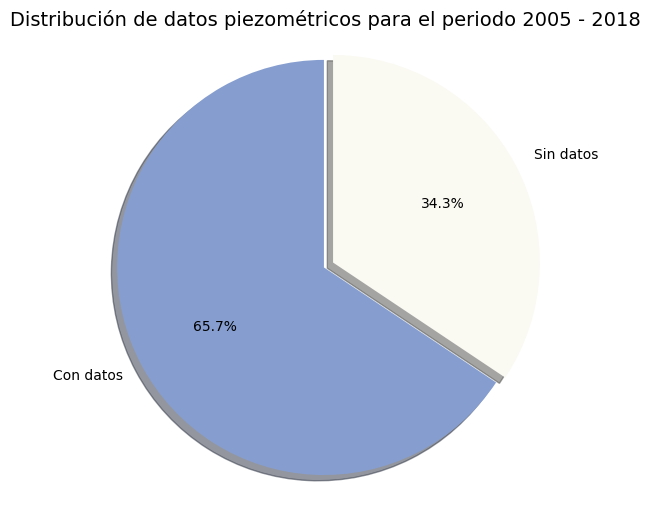

In [18]:
import matplotlib.pyplot as plt

# Datos
valores_con_dato = 1443
valores_sin_dato = 755

# Etiquetas y valores
labels = ['Con datos', 'Sin datos']
sizes = [valores_con_dato, valores_sin_dato]
colors = ['#869ecf', '#faf9f2']  # Verde y naranja
explode = (0.05, 0)  # Separar un poco el primer sector

# Gráfica de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Mostrar porcentaje
    startangle=90,
    explode=explode,
    shadow=True
)

plt.title('Distribución de datos piezométricos para el periodo 2005 - 2018\n de 157 pozos distribuidos en el acuífero Conejos-Medános ', fontsize=14)
plt.axis('equal')  # Mantener forma de círculo
plt.show()



#  <span style="color:#cc416d"> Disponibilidad de datos </span>

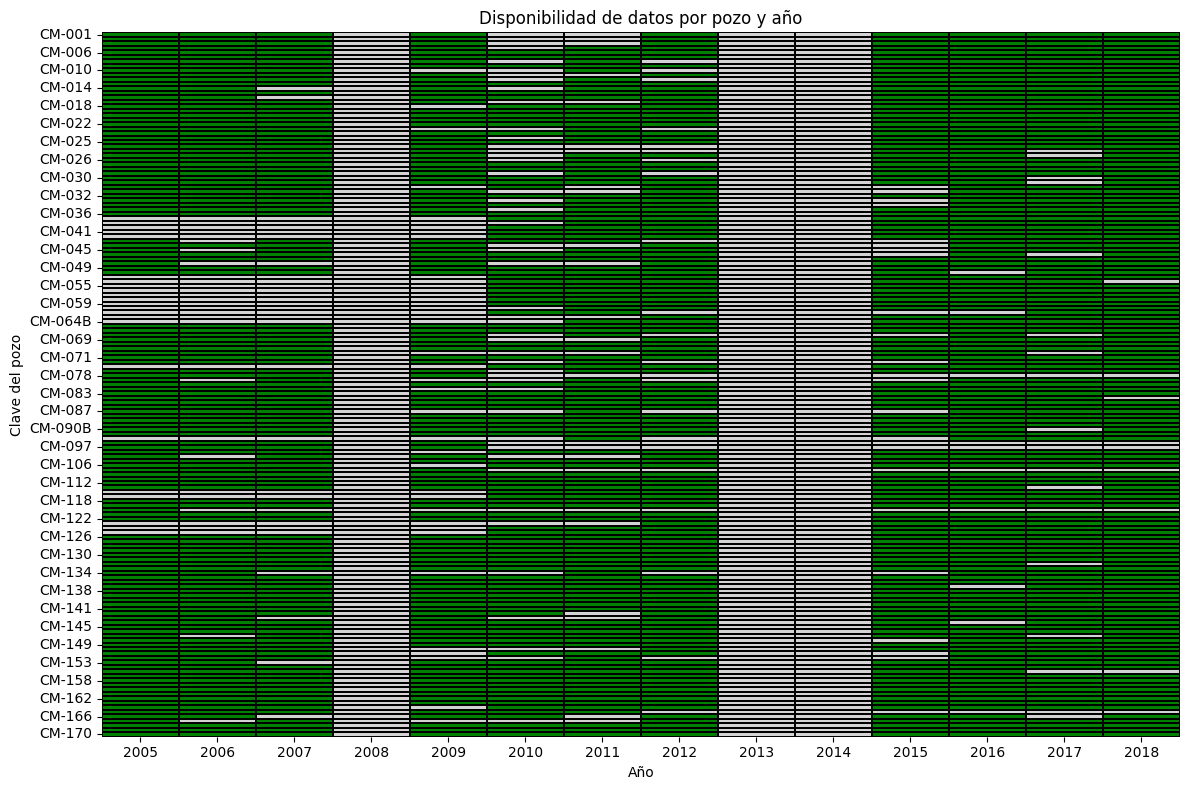

In [4]:
# Detectar columnas de años
anios = [col for col in df.columns if col.isdigit()]

# Crear una matriz binaria (1 = tiene valor, 0 = no tiene valor)
matriz = df[anios].notna().astype(int)

# Opcional: usar el ID del pozo como índice
matriz.index = df['clv']

# Crear figura
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz,
    cmap=['lightgrey', 'green'],  # Gris = sin dato, Verde = con dato
    cbar=False,
    linewidths=0.2,
    linecolor='black'
)

plt.title('Disponibilidad de datos por pozo y año')
plt.xlabel('Año')
plt.ylabel('Clave del pozo')
plt.tight_layout()
# Guardar imagen
salida = os.path.join(ruta_salida, "datos.png")
plt.savefig(salida, dpi=300)

plt.show()





#  <span style="color:#cc416d"> Evolución de valores por pozo con y sin huecos </span>

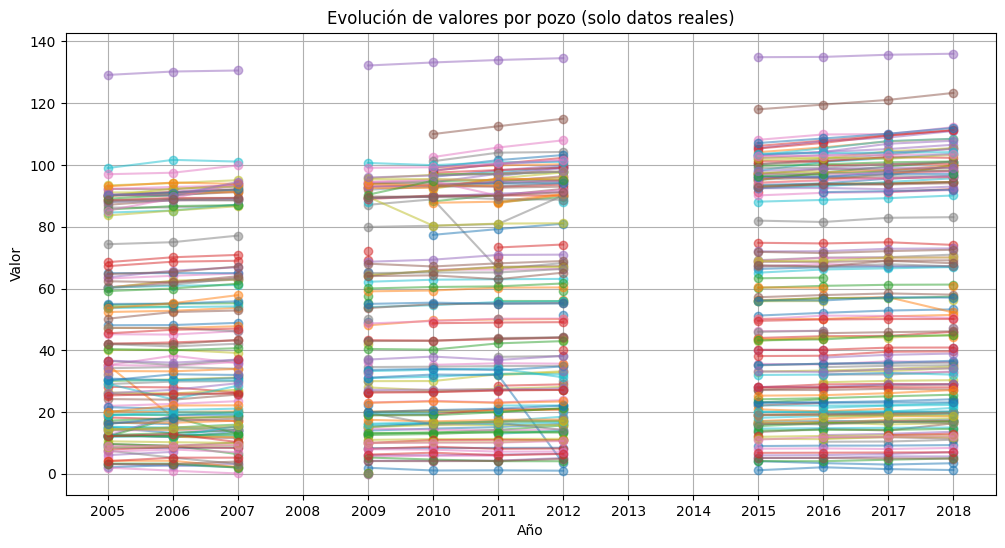

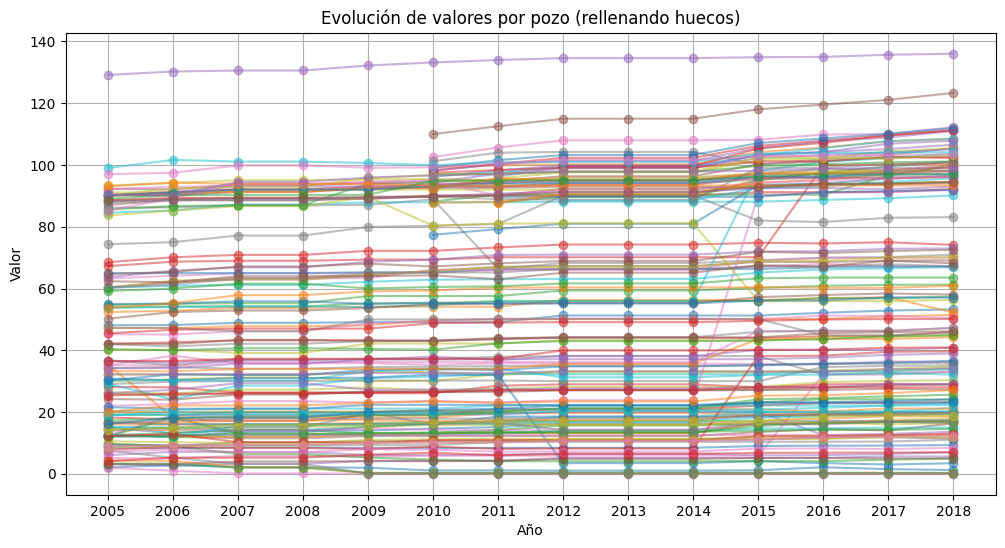

In [6]:
# Lista de años como strings
anios = [str(y) for y in range(2005, 2019)]

# --- VERSIÓN 1: solo valores reales ---
plt.figure(figsize=(12, 6))
for _, row in df.iterrows():
    plt.plot(
        anios,
        row[anios],
        marker='o',
        linestyle='-',
        alpha=0.5
    )

plt.title("Evolución de valores por pozo (solo datos reales)")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.grid(True)
salida = os.path.join(ruta_salida, "hist_piezometria_datReales.png")
plt.savefig(salida, dpi=300)
plt.show()


# --- VERSIÓN 2: con relleno de huecos (forward fill) ---
df_ffill = df.copy()
df_ffill[anios] = df_ffill[anios].ffill(axis=1)  # Rellenar hacia adelante por fila

plt.figure(figsize=(12, 6))
for _, row in df_ffill.iterrows():
    plt.plot(
        anios,
        row[anios],
        marker='o',
        linestyle='-',
        alpha=0.5
    )

plt.title("Evolución de valores por pozo (rellenando huecos)")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.grid(True)
salida = os.path.join(ruta_salida, "hist_piezometria_relleno.png")
plt.savefig(salida, dpi=300)
plt.show()


#  <span style="color:#cc416d"> Pozos con cambios > 5 m entre años consecutivos </span>


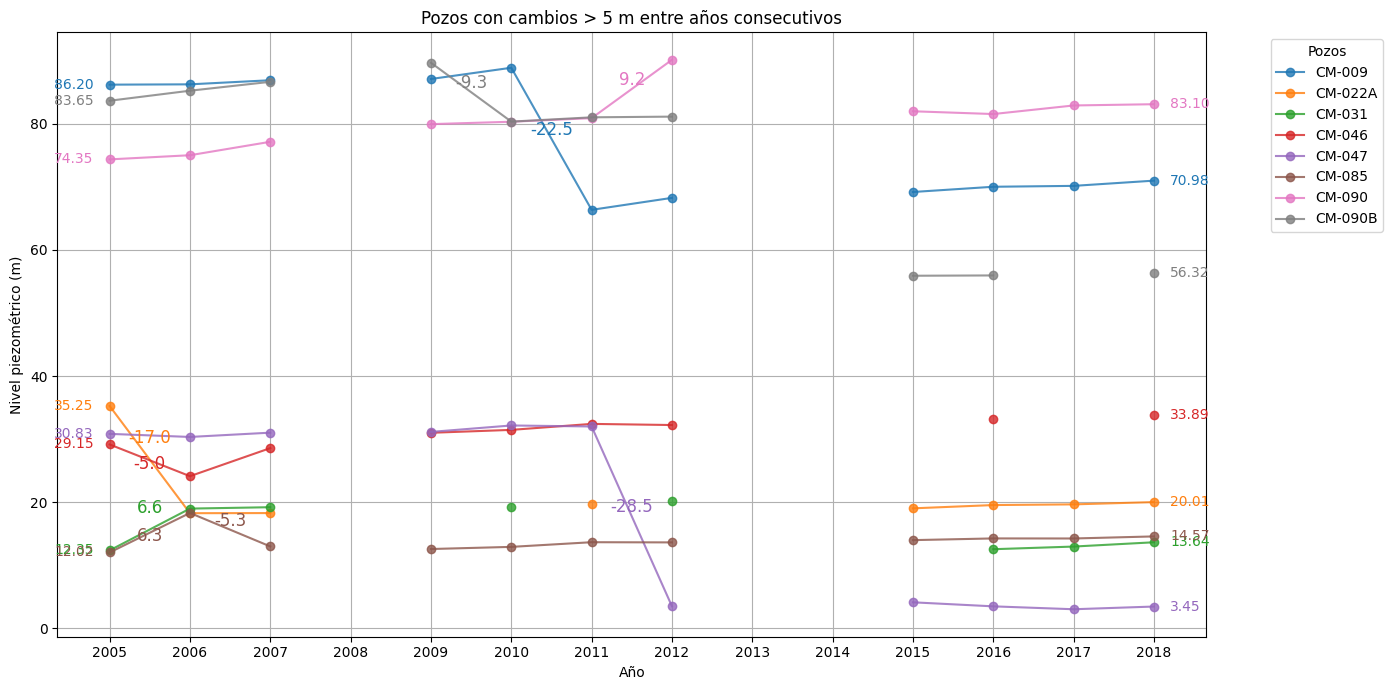

In [26]:
# Lista de años como strings
anios = [str(y) for y in range(2005, 2019)]

# Calcular diferencias absolutas entre años consecutivos
df_diff = df[anios].diff(axis=1)

# Filtrar pozos con algún cambio mayor a 5 m (en valor absoluto)
pozos_cambio_grande = df[df_diff.abs().gt(5).any(axis=1)]

# Lista de empalmes y ajustes manuales
desplazamientos = {
    ("CM-022A", "2005", "2006"):  2,   # mover +2 m hacia arriba
    ("CM-046",  "2005", "2006"): -2,   # mover -2 m hacia abajo
    ("CM-031",  "2005", "2006"):  2,   # mover +2 m hacia arriba
    ("CM-085",  "2005", "2006"): -2    # mover -2 m hacia abajo
}

plt.figure(figsize=(14, 7))

# Graficar cada pozo
for _, row in pozos_cambio_grande.iterrows():
    # Graficar línea y obtener el color
    line, = plt.plot(anios, row[anios], marker='o', linestyle='-', alpha=0.8, label=row['clv'])
    line_color = line.get_color()
    
    # Etiqueta valor inicial (2005)
    if pd.notna(row["2005"]):
        plt.text(
            -0.2, row["2005"], f"{row['2005']:.2f}",  # desplazado un poco a la izquierda
            ha='right', va='center', fontsize=10, color=line_color
        )
    
    # Etiqueta valor final (2018) desplazada
    if pd.notna(row["2018"]):
        plt.text(
            len(anios)-1 + 0.2, row["2018"], f"{row['2018']:.2f}",  # desplazado a la derecha
            ha='left', va='center', fontsize=10, color=line_color
        )
    
    # Etiquetas de cambios > 5 m con mismo color que línea
    for i in range(1, len(anios)):
        val_anterior = row[anios[i-1]]
        val_actual = row[anios[i]]
        
        if pd.notna(val_anterior) and pd.notna(val_actual):
            cambio = val_actual - val_anterior
            if abs(cambio) > 5:
                y_pos = (val_anterior + val_actual) / 2
                
                # Ajuste por empalmes
                key = (row['clv'], anios[i-1], anios[i])
                if key in desplazamientos:
                    y_pos += desplazamientos[key]
                
                plt.text(
                    i - 0.5,
                    y_pos,
                    f"{cambio:.1f}",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    rotation=0,
                    color=line_color
                )

plt.title("Pozos con cambios > 5 m entre años consecutivos")
plt.xlabel("Año")
plt.ylabel("Nivel piezométrico (m)")
plt.grid(True)

# Leyenda fuera del gráfico
plt.legend(title="Pozos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

salida = os.path.join(ruta_salida, "cambiosMay.png")
plt.savefig(salida, dpi=300)
plt.show()


#  <span style="color:#cc416d"> Pozos con cambios > 5 m entre años consecutivos </span>
###  <span style="color:#cc416d"> negativos en rojo, positivos en negro </span>

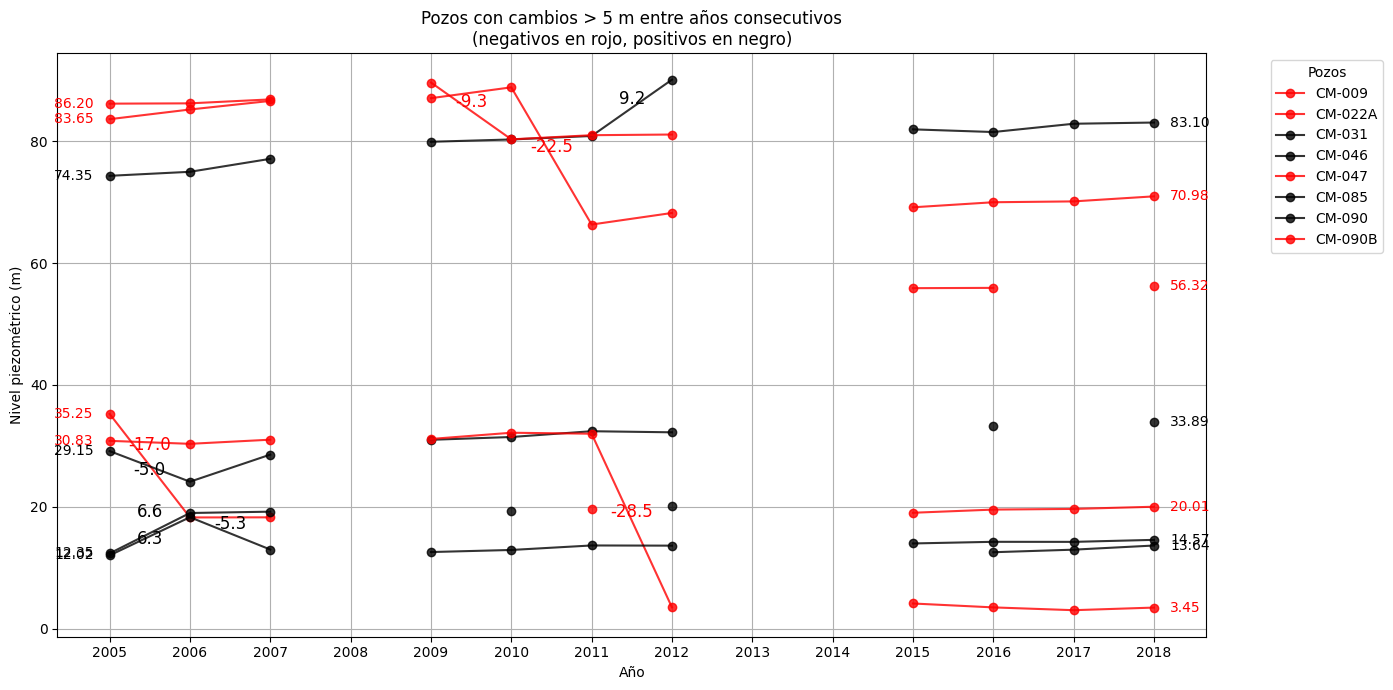

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer CSV
ruta_csv = r"C:/Proyectos/2024/Conejos/mapas/pozos.csv"
df = pd.read_csv(ruta_csv)

# Lista de años como strings
anios = [str(y) for y in range(2005, 2019)]

# Calcular diferencias absolutas entre años consecutivos
df_diff = df[anios].diff(axis=1)

# Filtrar pozos con algún cambio > 5 m (en valor absoluto)
pozos_cambio_grande = df[df_diff.abs().gt(5).any(axis=1)]

# Lista de empalmes y ajustes manuales
desplazamientos = {
    ("CM-022A", "2005", "2006"):  2,
    ("CM-046",  "2005", "2006"): -2,
    ("CM-031",  "2005", "2006"):  2,
    ("CM-085",  "2005", "2006"): -2
}

plt.figure(figsize=(14, 7))

for _, row in pozos_cambio_grande.iterrows():
    # Calcular cambio total (2018 - 2005)
    cambio_total = None
    if pd.notna(row["2005"]) and pd.notna(row["2018"]):
        cambio_total = row["2018"] - row["2005"]

    # Asignar color según signo
    if cambio_total is not None and cambio_total < 0:
        color_linea = "red"     # Negativo
    else:
        color_linea = "black"  # Positivo o sin cambio

    # Graficar línea con color asignado
    plt.plot(anios, row[anios], marker='o', linestyle='-', alpha=0.8, color=color_linea, label=row['clv'])
    
    # Valor inicial (2005)
    if pd.notna(row["2005"]):
        plt.text(
            -0.2, row["2005"], f"{row['2005']:.2f}",
            ha='right', va='center', fontsize=10, color=color_linea
        )
    
    # Valor final (2018) desplazado
    if pd.notna(row["2018"]):
        plt.text(
            len(anios)-1 + 0.2, row["2018"], f"{row['2018']:.2f}",
            ha='left', va='center', fontsize=10, color=color_linea
        )
    
    # Etiquetas de cambios > 5 m con mismo color que línea
    for i in range(1, len(anios)):
        val_anterior = row[anios[i-1]]
        val_actual = row[anios[i]]
        
        if pd.notna(val_anterior) and pd.notna(val_actual):
            cambio = val_actual - val_anterior
            if abs(cambio) > 5:
                y_pos = (val_anterior + val_actual) / 2
                
                # Ajuste manual si es un empalme conocido
                key = (row['clv'], anios[i-1], anios[i])
                if key in desplazamientos:
                    y_pos += desplazamientos[key]
                
                plt.text(
                    i - 0.5, y_pos, f"{cambio:.1f}",
                    ha='center', va='bottom', fontsize=12, rotation=0, color=color_linea
                )

plt.title("Pozos con cambios > 5 m entre años consecutivos\n(negativos en rojo, positivos en negro)")
plt.xlabel("Año")
plt.ylabel("Nivel piezométrico (m)")
plt.grid(True)

# Leyenda fuera del gráfico
plt.legend(title="Pozos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
salida = os.path.join(ruta_salida, "cambiosNegPos.png")
plt.savefig(salida, dpi=300)
plt.show()
